In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load in airbnb data
airbnb = pd.read_csv("dataset/listings.csv")
airbnb

,id,neighbourhood,room_type,accommodates,bathrooms,bedrooms,beds,price
0,1.318800e+04,Riley Park,Entire home/apt,4,1.0,0.0,2.0,14
1,1.335800e+04,Downtown,Entire home/apt,2,1.0,1.0,1.0,20
2,1.349000e+04,Kensington-Cedar Cottage,Entire home/apt,2,1.0,1.0,1.0,35
3,1.426700e+04,Kensington-Cedar Cottage,Entire home/apt,4,1.0,1.0,2.0,35
4,1.625400e+04,Hastings-Sunrise,Entire home/apt,4,1.0,2.0,3.0,36
...,...,...,...,...,...,...,...,...
4981,9.970000e+17,Downtown,Entire home/apt,4,1.0,1.0,2.0,3000
4982,9.970000e+17,South Cambie,Entire home/apt,4,NaN,2.0,NaN,5714
4983,9.970000e+17,South Cambie,Private room,2,1.0,1.0,0.0,8495
4984,9.970000e+17,Downtown,Entire home/apt,4,NaN,2.0,NaN,9600


In [3]:
airbnb["price"].mean() #population parameter

np.float64(249.16526273565984)

In [13]:
#np.random.seed(100)
airbnb.sample(n=40)["price"].mean() #point estimate

np.float64(237.3)

In [ ]:
sample_list = []

for i in range(20_000):
    sample = airbnb.sample(n = 40) #randomly sample 40 listings
    sample = sample.assign(replicate = i) #keep track of sample number
    sample_list.append(sample) #append dataframe to the list

In [16]:
samples = pd.concat(sample_list) #concatenate all df into one large one
samples

,id,neighbourhood,room_type,accommodates,bathrooms,bedrooms,beds,price,replicate
3628,7.650000e+17,Mount Pleasant,Entire home/apt,2,NaN,1.0,NaN,275,0
3668,7.740000e+17,Kensington-Cedar Cottage,Entire home/apt,10,1.5,4.0,4.0,280,0
3070,6.430000e+17,Dunbar Southlands,Entire home/apt,4,1.0,2.0,2.0,226,0
2084,4.315034e+07,Downtown,Entire home/apt,2,1.0,1.0,2.0,165,0
4425,9.130000e+17,Downtown Eastside,Entire home/apt,6,2.0,3.0,4.0,412,0
...,...,...,...,...,...,...,...,...,...
2133,4.422732e+07,Victoria-Fraserview,Private room,2,NaN,NaN,NaN,168,19999
2354,4.873766e+07,Hastings-Sunrise,Entire home/apt,2,1.0,0.0,1.0,179,19999
2170,4.534524e+07,Downtown,Entire home/apt,6,2.0,2.0,3.0,169,19999
3798,8.030000e+17,Victoria-Fraserview,Private room,1,1.0,1.0,1.0,298,19999


In [20]:
sample_estimates = samples.groupby("replicate")["price"].mean().reset_index(name="sample_mean")
sample_estimates

,replicate,sample_mean
0,0,242.500
1,1,303.525
2,2,216.775
3,3,200.300
4,4,269.600
...,...,...
19995,19995,190.725
19996,19996,251.575
19997,19997,186.150
19998,19998,304.750


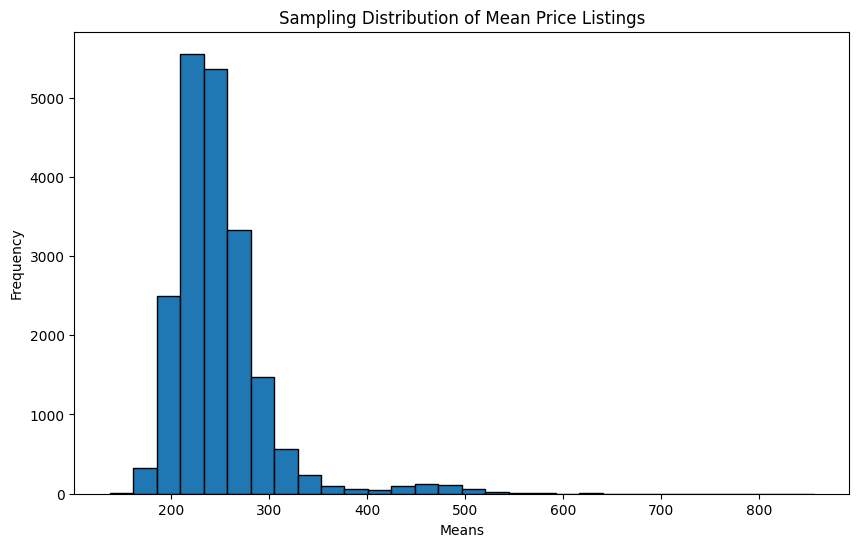

In [21]:
# Plot the histogram of the sampling distribution
plt.figure(figsize=(10, 6))
plt.hist(sample_estimates['sample_mean'], bins=30, edgecolor='black')


# Add titles and labels
plt.title('Sampling Distribution of Mean Price Listings')
plt.xlabel('Means')
plt.ylabel('Frequency')

# Show the plot
plt.show()


In [42]:
#Bootstrapping
np.random.seed(1234)
one_sample = airbnb.sample(n=40) #this is our single sample
one_sample['price'].mean()

np.float64(219.85)

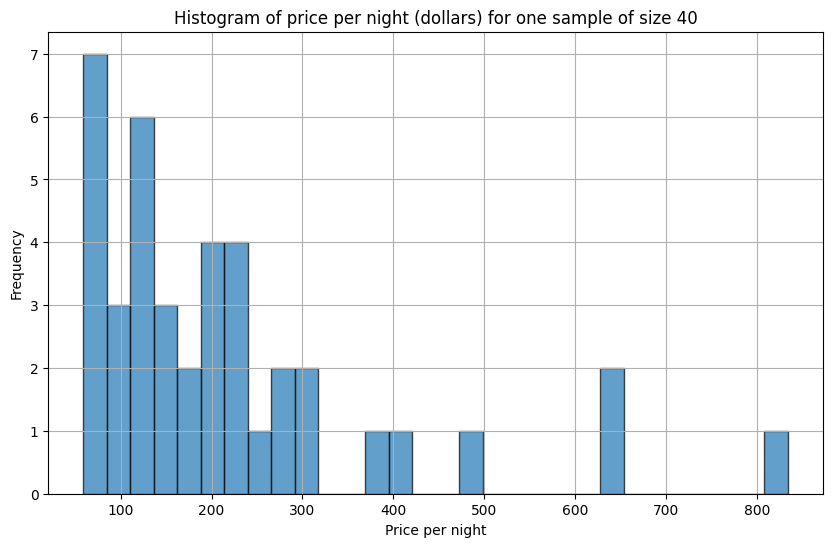

In [43]:
# Histogram of price per night (dollars) for one sample of size 40.
plt.figure(figsize=(10, 6))
plt.hist(one_sample['price'], bins=30, edgecolor='black', alpha=0.7)

# Add titles and labels
plt.title('Histogram of price per night (dollars) for one sample of size 40')
plt.xlabel('Price per night')
plt.ylabel('Frequency')

# Show the plot
plt.grid(True)
plt.show()

In [44]:
boot1 = one_sample.sample(frac=1, replace = True) #bootstrap sample
boot1

,id,neighbourhood,room_type,accommodates,bathrooms,bedrooms,beds,price
3017,6.310000e+17,West End,Entire home/apt,2,1.0,1.0,0.0,223
608,1.554257e+07,Kitsilano,Entire home/apt,5,1.0,2.0,3.0,99
240,5.347437e+06,Downtown,Entire home/apt,3,1.0,2.0,2.0,69
361,8.429321e+06,Fairview,Entire home/apt,4,1.0,1.0,1.0,79
149,3.100878e+06,Downtown,Entire home/apt,2,1.0,1.0,0.0,60
1465,3.287258e+07,Kitsilano,Entire home/apt,4,2.0,2.0,2.0,136
3599,7.590000e+17,Kensington-Cedar Cottage,Entire home/apt,8,NaN,3.0,NaN,273
548,1.455531e+07,Grandview-Woodland,Entire home/apt,2,NaN,1.0,NaN,95
240,5.347437e+06,Downtown,Entire home/apt,3,1.0,2.0,2.0,69
1619,3.519493e+07,West End,Entire home/apt,3,1.0,1.0,2.0,143


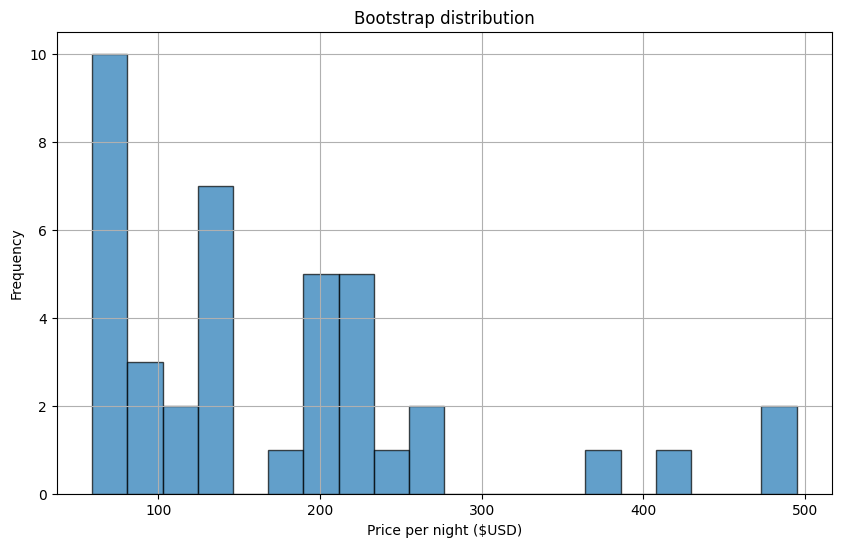

In [45]:
# Plot the histogram of the bootstrap distribution
plt.figure(figsize=(10, 6))
plt.hist(boot1['price'], bins=20, edgecolor='black', alpha=0.7)

# Add titles and labels
plt.title('Bootstrap distribution')
plt.xlabel('Price per night ($USD)')
plt.ylabel('Frequency')

# Show the plot
plt.grid(True)
plt.show()


In [46]:
bootstrap_samples = []

for i in range(20_000):
    sample = one_sample.sample(frac = 1, replace = True)
    sample = sample.assign(replicate = i)
    bootstrap_samples.append(sample)

In [47]:
boot20000 = pd.concat(bootstrap_samples)
boot20000

,id,neighbourhood,room_type,accommodates,bathrooms,bedrooms,beds,price,replicate
2480,5.073003e+07,Oakridge,Entire home/apt,3,NaN,2.0,NaN,188,0
4419,9.120000e+17,Downtown,Entire home/apt,4,1.5,2.0,2.0,409,0
273,6.315732e+06,Fairview,Entire home/apt,3,1.0,1.0,2.0,70,0
548,1.455531e+07,Grandview-Woodland,Entire home/apt,2,NaN,1.0,NaN,95,0
3795,8.020000e+17,Riley Park,Entire home/apt,4,1.0,2.0,2.0,298,0
...,...,...,...,...,...,...,...,...,...
3560,7.510000e+17,Kitsilano,Entire home/apt,4,1.0,1.0,2.0,269,19999
1465,3.287258e+07,Kitsilano,Entire home/apt,4,2.0,2.0,2.0,136,19999
3115,6.550000e+17,Downtown,Entire home/apt,5,2.0,3.0,3.0,230,19999
2480,5.073003e+07,Oakridge,Entire home/apt,3,NaN,2.0,NaN,188,19999


In [48]:
boot_means = boot20000.groupby("replicate")["price"].mean().reset_index(name = "mean_price")
boot_means

,replicate,mean_price
0,0,208.250
1,1,205.800
2,2,183.925
3,3,211.600
4,4,239.475
...,...,...
19995,19995,176.725
19996,19996,217.450
19997,19997,204.600
19998,19998,216.900


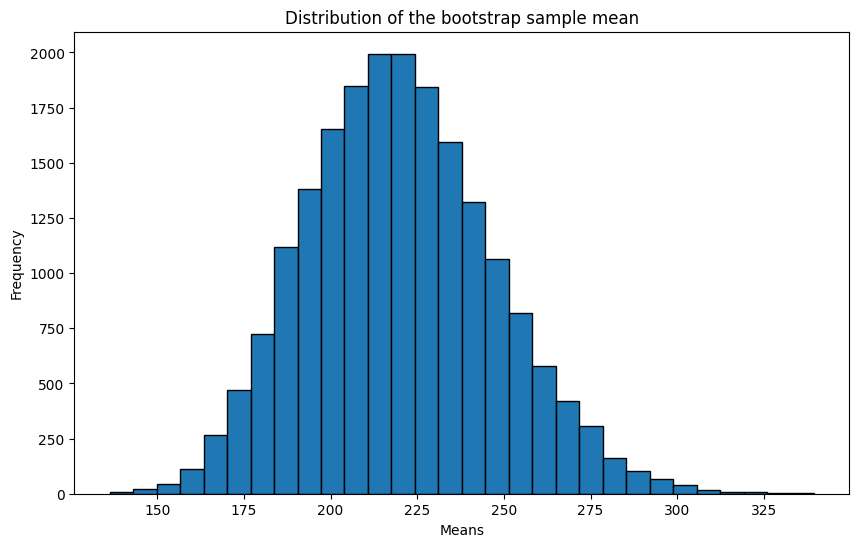

In [49]:
# Plot the histogram of the sampling distribution
plt.figure(figsize=(10, 6))
plt.hist(boot_means['mean_price'], bins=30, edgecolor='black')


# Add titles and labels
plt.title('Distribution of the bootstrap sample mean')
plt.xlabel('Means')
plt.ylabel('Frequency')

# Show the plot
plt.show()


In [50]:
boot_means["mean_price"].quantile([0.025,0.975])

0.025    171.248750
0.975    276.300625
Name: mean_price, dtype: float64